In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D  
from tensorflow.keras.layers import MaxPooling2D  
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense  
import warnings
warnings.filterwarnings("ignore")

In [4]:
classifier = Sequential()
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
             
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Flatten())
classifier.add(Dense(units = 128, activation = 'relu'))    
classifier.add(Dense(units = 1, activation = 'sigmoid'))  

In [5]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [6]:
classifier.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 21, 21, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 10, 10, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 3, 3, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 1, 1, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,497 (56.63 KB)

 Trainable params: 14,497 (56.63 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:

import tensorflow as tf

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)  # max normilization
                                   

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory(r"C:\Users\asus\Downloads\Image_Classification_Dataset\seg_test",
                                                 target_size = (64, 64),  # HEIGHT AND WIDTH
                                                 batch_size = 32, # take 32 group which pick image randomly without replacement
                                                 class_mode = 'binary') # binary because we have 2 type = cat / dogs

training_set = train_datagen.flow_from_directory(r"C:\Users\asus\Downloads\Image_Classification_Dataset\seg_train",
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 911 images belonging to 2 classes.
Found 4462 images belonging to 2 classes.


In [8]:
training_set.class_indices

{'buildings': 0, 'forest': 1}

In [9]:
result = classifier.fit(training_set,
                         epochs=10, 
                         validation_data = test_set)

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 18s 105ms/step - accuracy: 0.7374 - loss: 0.5288 - val_accuracy: 0.8617 - val_loss: 0.3243
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 12s 84ms/step - accuracy: 0.8797 - loss: 0.2874 - val_accuracy: 0.8968 - val_loss: 0.2653
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 12s 79ms/step - accuracy: 0.9055 - loss: 0.2426 - val_accuracy: 0.9144 - val_loss: 0.2295
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 12s 81ms/step - accuracy: 0.9210 - loss: 0.2115 - val_accuracy: 0.9067 - val_loss: 0.2404
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 12s 80ms/step - accuracy: 0.9154 - loss: 0.2197 - val_accuracy: 0.9210 - val_loss: 0.2229
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 13s 93ms/step - accuracy: 0.9332 - loss: 0.1790 - val_accuracy: 0.9023 - val_loss: 0.2548
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 12s 83ms/step - accuracy: 0.9213 - loss: 0.1929 - val_accuracy: 0.9221 - val_loss: 0.2216
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 12s 82ms/step - accuracy: 0.9210 - loss: 0.2020 -

In [10]:
classifier.save('Image_Classification.h5')

import warnings 
warnings.filterwarnings("ignore")

In [11]:
from keras.models import load_model
from keras_preprocessing import image
import numpy as np
import cv2   
import matplotlib.pyplot as plt 
%matplotlib inline

In [12]:
reload_model = load_model("Image_Classification.h5")

In [18]:
def model_output (path):
    raw_img = image.load_img(path,target_size=(64,64))   
    raw_img = image.img_to_array(raw_img)  
    raw_img = np.expand_dims(raw_img, axis=0)
    raw_img = raw_img/255                     
    Probability = reload_model.predict(raw_img)[0][0]  
    plt.imshow(cv2.imread(path))                
    print('Probability : ',Probability)
    if Probability > 0.5:
        print("its a Forest")
    else:
        print("its a Building")

In [19]:
import os 
os.chdir(r"C:\Users\asus\Downloads\Image_Classification_Dataset")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Probability :  0.024409164
its a Building


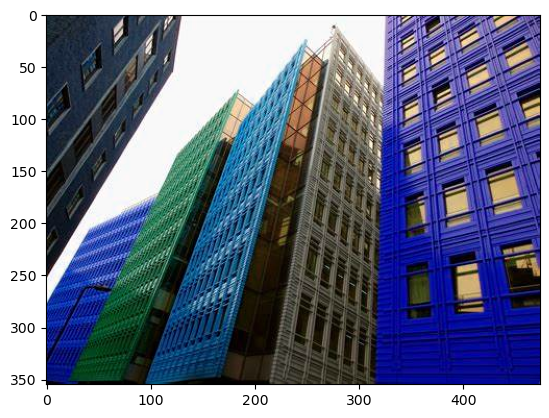

In [20]:
model_output(r'C:\Users\asus\Downloads\building2.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Probability :  0.98171145
its a Forest


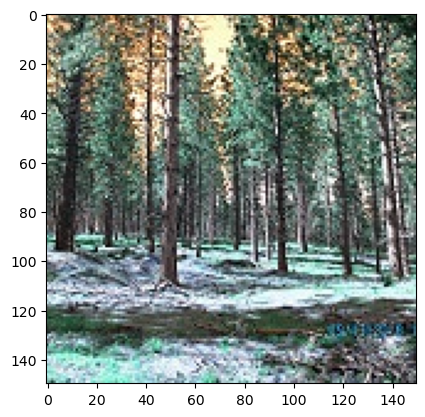

In [21]:
model_output(r'C:\Users\asus\Downloads\Image_Classification_Dataset\seg_test\forest\20062.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Probability :  0.9999356
its a Forest


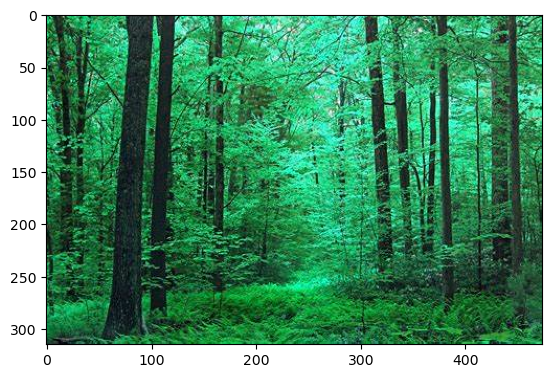

In [23]:
model_output(r'C:\Users\asus\Downloads\forest2.jpeg')

# Finished GOOD PERFROM(PREDICT)